In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
from pyod.models.iforest import IForest
import numpy as np
from sklearn.metrics import classification_report
from pyod.models.hbos import HBOS
from pyod.models.knn import KNN
from pyod.models.lscp import LSCP

from sklearn.metrics import accuracy_score
from pyod.models.pca import PCA
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
import warnings
from pyod.utils.data import evaluate_print
from sklearn.preprocessing import StandardScaler

from scipy.stats import ConstantInputWarning

warnings.simplefilter("ignore", ConstantInputWarning)
warnings.filterwarnings("ignore", category=UserWarning, message="Local min features equals local max features; use all features instead.")
warnings.filterwarnings("ignore", category=UserWarning, message="Local min features smaller than 1, increasing to 1.0")
warnings.filterwarnings("ignore", category=UserWarning, message="The number of histogram bins is greater than the number of classifiers, reducing n_bins to n_clf.")


In [2]:
df=pd.read_csv("/Users/saikarthik/Desktop/Nexus-S1 Deakin /datasets /cleaned_LEAD.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'building_id', 'meter_reading', 'anomaly'], dtype='object')

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [5]:
df.columns

Index(['timestamp', 'building_id', 'meter_reading', 'anomaly'], dtype='object')

In [6]:
df.isnull().sum()

timestamp        0
building_id      0
meter_reading    0
anomaly          0
dtype: int64

In [7]:
df["anomaly"].value_counts()

anomaly
0.0    1712198
1.0      37296
Name: count, dtype: int64

In [8]:
scaler = StandardScaler()
X = df[['meter_reading']].values
X_scaled = scaler.fit_transform(X)
X=X_scaled

# Essembled Based 

## LSCP

In [ ]:
detectors = [
    KNN(),
    IForest(),
    LOF()
]


In [ ]:
clf_lscp = LSCP(detectors)  


In [11]:
clf_lscp.fit(X)


In [ ]:
y_pred_lscp= clf_lscp.labels_  
y_scores_lscp = clf_lscp.decision_scores_ 

In [ ]:
df_subset = df.iloc[:1000]
y_pred_lscp_subset = y_pred_lscp[:1000]  

plt.figure(figsize=(12, 6))

plt.plot(df_subset['timestamp'], df_subset['meter_reading'], label='Time Series Data', alpha=0.7)

plt.scatter(df_subset['timestamp'][y_pred_lscp_subset == 1], df_subset['meter_reading'][y_pred_lscp_subset == 1], 
            color='red', marker='x', label='Detected Anomalies (HBOS)', alpha=0.7)

plt.scatter(df_subset['timestamp'][df_subset['anomaly'] == 1], df_subset['meter_reading'][df_subset['anomaly'] == 1], 
            color='blue', marker='o', label='Ground Truth Anomalies', alpha=0.7)

plt.title('Time Series Anomaly Detection (IF)')
plt.xlabel('Timestamp')
plt.ylabel('Meter Reading')

plt.legend()

plt.show()

In [ ]:
print(classification_report(df['anomaly'], y_pred_lscp))
accuracy_lscp = accuracy_score(df['anomaly'], y_pred_lscp)


In [ ]:
accuracy_lscp*100

## Isolation Forest 

In [9]:
clf = IForest(contamination=0.1, random_state=42)

In [10]:
clf.fit(X)


IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=42,
    verbose=0)

In [11]:
y_pred_if = clf.predict(X) 

In [12]:
y_scores_if= clf.decision_function(X)

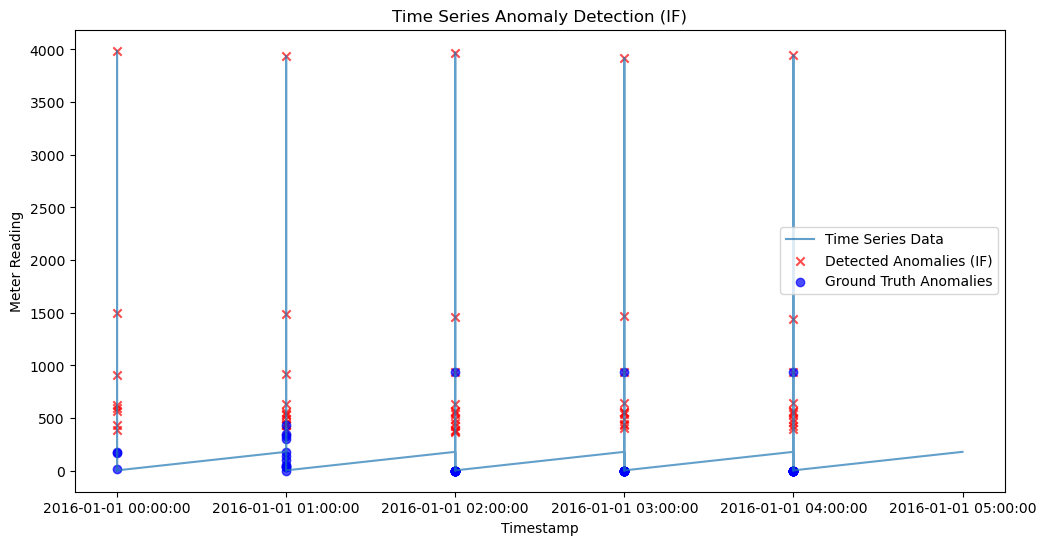

In [13]:
df_subset = df.iloc[:1000]
y_pred_if_subset = y_pred_if[:1000]  

plt.figure(figsize=(12, 6))

plt.plot(df_subset['timestamp'], df_subset['meter_reading'], label='Time Series Data', alpha=0.7)

plt.scatter(df_subset['timestamp'][y_pred_if_subset == 1], df_subset['meter_reading'][y_pred_if_subset == 1], 
            color='red', marker='x', label='Detected Anomalies (IF)', alpha=0.7)

plt.scatter(df_subset['timestamp'][df_subset['anomaly'] == 1], df_subset['meter_reading'][df_subset['anomaly'] == 1], 
            color='blue', marker='o', label='Ground Truth Anomalies', alpha=0.7)

plt.title('Time Series Anomaly Detection (IF)')
plt.xlabel('Timestamp')
plt.ylabel('Meter Reading')

plt.legend()

plt.show()

In [14]:
print(classification_report(df['anomaly'], y_pred_if))


              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94   1712198
         1.0       0.02      0.07      0.03     37296

    accuracy                           0.88   1749494
   macro avg       0.50      0.49      0.48   1749494
weighted avg       0.96      0.88      0.92   1749494



In [15]:
accuracy = accuracy_score(df['anomaly'], y_pred_if)
accuracy*100

88.18698435090376

# Proximity Based 

## HBOS

In [16]:
clf_hbos = HBOS()
clf_hbos.fit(X)

HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [17]:
y_predict_hbos = clf_hbos.predict(X)

In [18]:
y_scores_hbos=clf_hbos.decision_function(X)

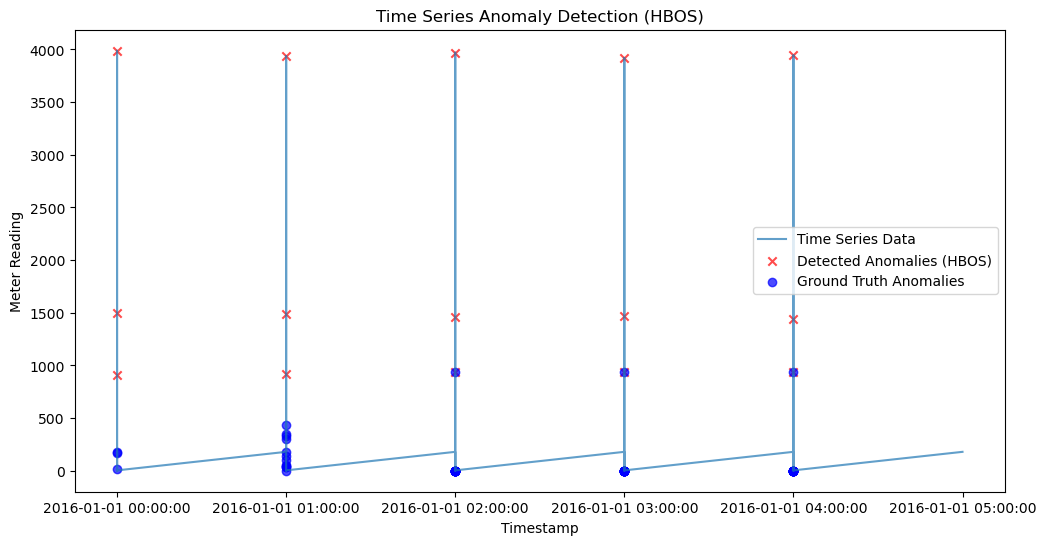

In [20]:
y_pred_hbos_subset = y_predict_hbos[:1000]

plt.figure(figsize=(12, 6))

plt.plot(df_subset['timestamp'], df_subset['meter_reading'], label='Time Series Data', alpha=0.7)

plt.scatter(df_subset['timestamp'][y_pred_hbos_subset == 1], df_subset['meter_reading'][y_pred_hbos_subset == 1], 
            color='red', marker='x', label='Detected Anomalies (HBOS)', alpha=0.7)

plt.scatter(df_subset['timestamp'][df_subset['anomaly'] == 1], df_subset['meter_reading'][df_subset['anomaly'] == 1], 
            color='blue', marker='o', label='Ground Truth Anomalies', alpha=0.7)

plt.title('Time Series Anomaly Detection (HBOS)')
plt.xlabel('Timestamp')
plt.ylabel('Meter Reading')

plt.legend()

plt.show()


In [21]:
print(classification_report(df['anomaly'], y_predict_hbos ))


              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97   1712198
         1.0       0.02      0.04      0.03     37296

    accuracy                           0.94   1749494
   macro avg       0.50      0.50      0.50   1749494
weighted avg       0.96      0.94      0.95   1749494



In [22]:
accuracy = accuracy_score(df['anomaly'], y_predict_hbos)
accuracy*100

94.45028105269296

## KNN 

In [23]:
clf_knn = KNN()
clf_knn.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [24]:
y_predict_knn = clf_knn.predict(X)
y_scores_knn = clf_knn.decision_function(X)

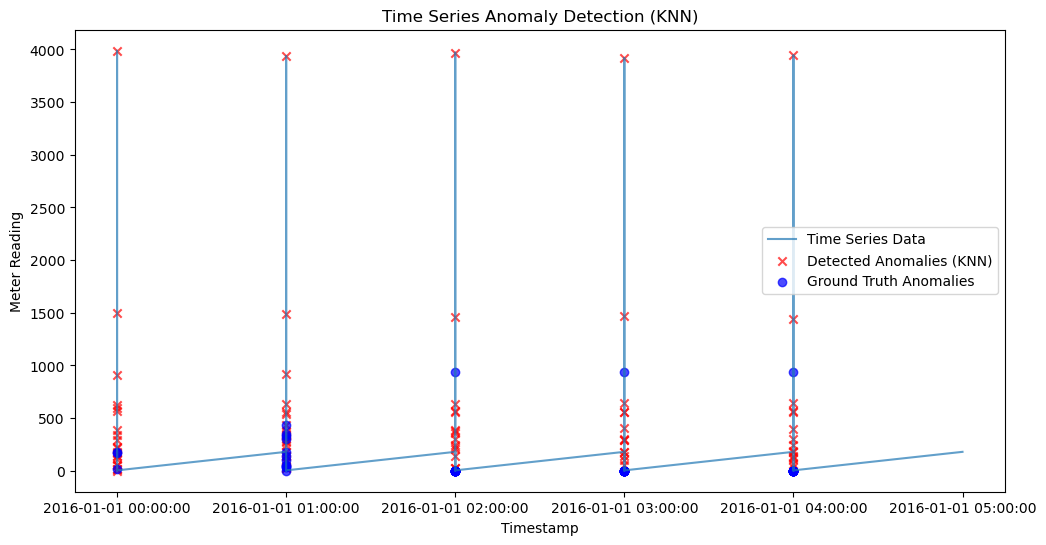

In [25]:
y_pred_knn_subset = y_predict_knn[:1000]

plt.figure(figsize=(12, 6))

plt.plot(df_subset['timestamp'], df_subset['meter_reading'], label='Time Series Data', alpha=0.7)

plt.scatter(df_subset['timestamp'][y_pred_knn_subset == 1], df_subset['meter_reading'][y_pred_knn_subset == 1], 
            color='red', marker='x', label='Detected Anomalies (KNN)', alpha=0.7)

plt.scatter(df_subset['timestamp'][df_subset['anomaly'] == 1], df_subset['meter_reading'][df_subset['anomaly'] == 1], 
            color='blue', marker='o', label='Ground Truth Anomalies', alpha=0.7)

plt.title('Time Series Anomaly Detection (KNN)')
plt.xlabel('Timestamp')
plt.ylabel('Meter Reading')

plt.legend()

plt.show()


In [26]:
print(classification_report(df['anomaly'], y_predict_knn))


              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94   1712198
         1.0       0.01      0.05      0.02     37296

    accuracy                           0.89   1749494
   macro avg       0.50      0.48      0.48   1749494
weighted avg       0.96      0.89      0.92   1749494



In [27]:
accuracy = accuracy_score(df['anomaly'], y_predict_knn)
accuracy*100

89.32262699957816

# Linear Model

## PCA 

In [28]:
clf_pca = PCA(n_components=1, contamination=0.1)
clf_pca.fit(X_scaled)


PCA(contamination=0.1, copy=True, iterated_power='auto', n_components=1,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [29]:
y_predict_pca = clf_pca.predict(X_scaled)
y_scores_pca = clf_pca.decision_function(X_scaled)

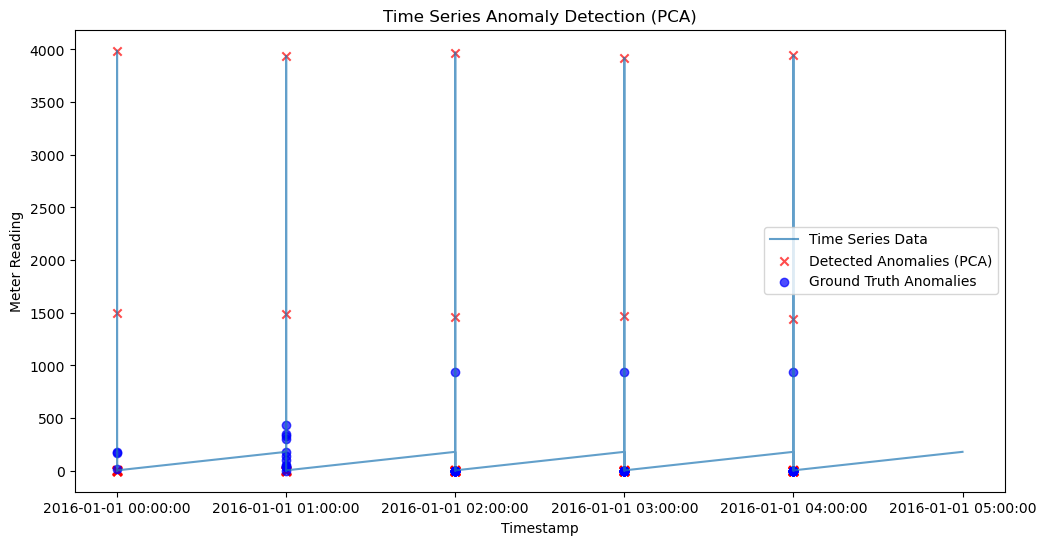

In [30]:
y_pred_pca_subset = y_predict_pca[:1000]

plt.figure(figsize=(12, 6))

plt.plot(df_subset['timestamp'], df_subset['meter_reading'], label='Time Series Data', alpha=0.7)

plt.scatter(df_subset['timestamp'][y_pred_pca_subset == 1], df_subset['meter_reading'][y_pred_pca_subset == 1], 
            color='red', marker='x', label='Detected Anomalies (PCA)', alpha=0.7)

plt.scatter(df_subset['timestamp'][df_subset['anomaly'] == 1], df_subset['meter_reading'][df_subset['anomaly'] == 1], 
            color='blue', marker='o', label='Ground Truth Anomalies', alpha=0.7)

plt.title('Time Series Anomaly Detection (PCA)')
plt.xlabel('Timestamp')
plt.ylabel('Meter Reading')

plt.legend()

plt.show()


In [31]:
print(classification_report(df['anomaly'], y_predict_pca))
accuracy = accuracy_score(df['anomaly'], y_predict_pca)

              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95   1712198
         1.0       0.11      0.50      0.18     37296

    accuracy                           0.90   1749494
   macro avg       0.55      0.70      0.56   1749494
weighted avg       0.97      0.90      0.93   1749494



In [32]:
accuracy *100

89.99962274806316

## MCD 

In [33]:
clf_mcd = MCD()
clf_mcd.fit(X)

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None)

In [34]:
y_predict_mcd = clf_mcd.predict(X) # type: ignore
y_scores_mcd = clf_mcd.decision_function(X) # type: ignore

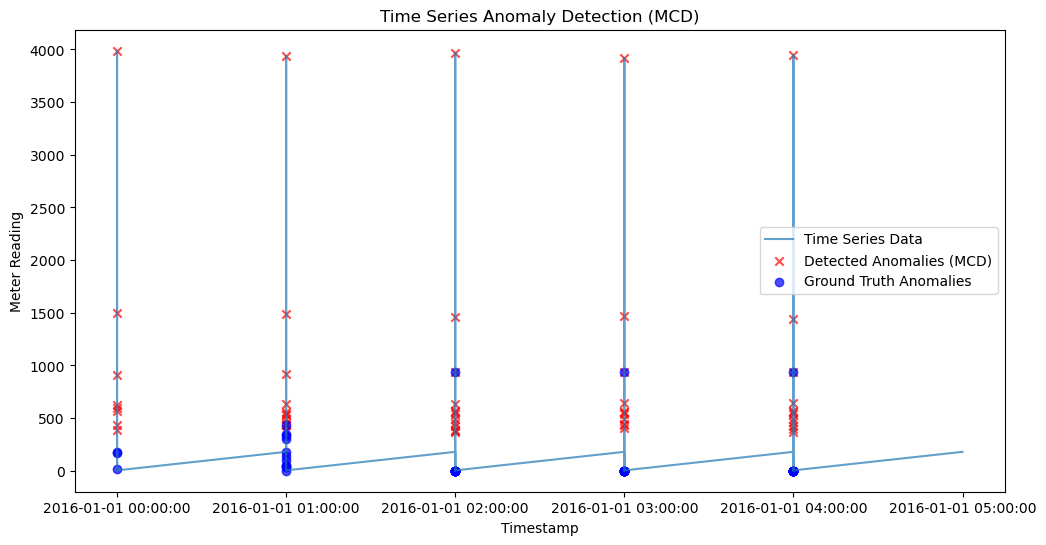

In [35]:
y_pred_mcd_subset = y_predict_mcd[:1000]

plt.figure(figsize=(12, 6))

plt.plot(df_subset['timestamp'], df_subset['meter_reading'], label='Time Series Data', alpha=0.7)

plt.scatter(df_subset['timestamp'][y_pred_mcd_subset == 1], df_subset['meter_reading'][y_pred_mcd_subset == 1], 
            color='red', marker='x', label='Detected Anomalies (MCD)', alpha=0.7)

plt.scatter(df_subset['timestamp'][df_subset['anomaly'] == 1], df_subset['meter_reading'][df_subset['anomaly'] == 1], 
            color='blue', marker='o', label='Ground Truth Anomalies', alpha=0.7)

plt.title('Time Series Anomaly Detection (MCD)')
plt.xlabel('Timestamp')
plt.ylabel('Meter Reading')

plt.legend()

plt.show()


In [36]:
print(classification_report(df['anomaly'], y_predict_mcd))
accuracy = accuracy_score(df['anomaly'], y_predict_mcd)

              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94   1712198
         1.0       0.02      0.07      0.03     37296

    accuracy                           0.88   1749494
   macro avg       0.50      0.49      0.48   1749494
weighted avg       0.96      0.88      0.92   1749494



In [37]:
accuracy*100

88.19870202469971

# Neural Network 

## Autoencoder

CODE (https://drive.google.com/drive/u/2/folders/14CT2ElG5eTvJm7ArN6WV6_XlRfqNJD6X)